<a href="https://colab.research.google.com/github/yeesem/Soft-Computing/blob/main/Soft_Computing_Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00


In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from deap import base,creator,tools,algorithms

Fan Speed :  55.95238095238095


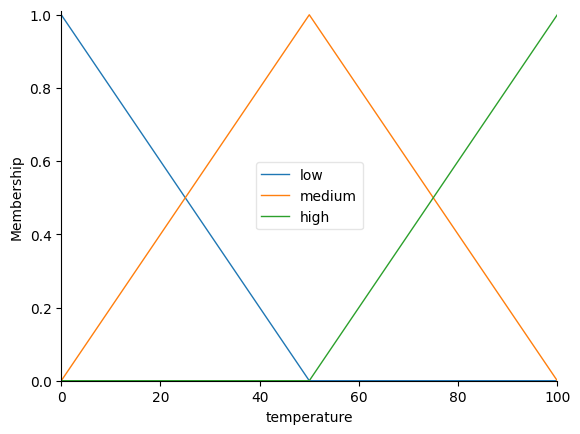

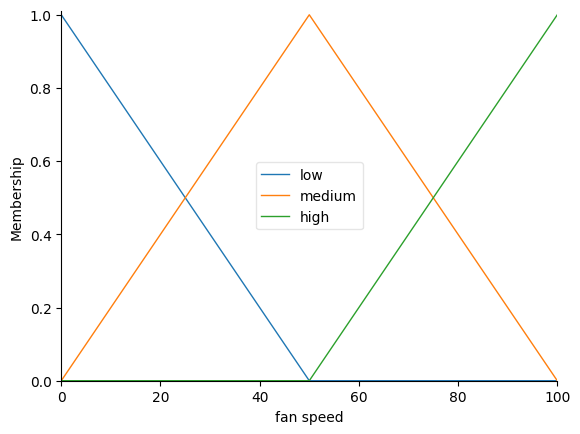

In [12]:
#Input of fuzzy logic
temperature = ctrl.Antecedent(np.arange(0,101,1),'temperature')
#Output of fuzzy logic
fan_speed = ctrl.Consequent(np.arange(0,101,1),'fan speed')

#fuzz.trimf stands for triangular membership function
#[0 , 0, 50] - specifies the parameters of the triangular function
#This means that the membership value of 'low' is 1 (fully belongs)
#when the temperature is 0 and decreases linearly to 0 when the temperature reaches 50.
temperature['low'] = fuzz.trimf(temperature.universe, [0 ,0, 50])
temperature['medium'] = fuzz.trimf(temperature.universe, [0 ,50, 100])
temperature['high'] = fuzz.trimf(temperature.universe, [50 ,100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

#Defines Rules
#These are the fuzzy rules that relate temperture to the fan speed
rule1 = ctrl.Rule(temperature['low'],fan_speed['low'])
rule2 = ctrl.Rule(temperature['medium'],fan_speed['medium'])
rule3 = ctrl.Rule(temperature['high'],fan_speed['high'])

#Create the Control System
#This integrates the defined rules into a control system
fan_speed_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
fan_speed_stimulator = ctrl.ControlSystemSimulation(fan_speed_ctrl)

#Stimulate Fuzzy System
fan_speed_stimulator.input['temperature'] = 75
fan_speed_stimulator.compute()
print("Fan Speed : ", fan_speed_stimulator.output['fan speed'])

temperature.view()
fan_speed.view()
